Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


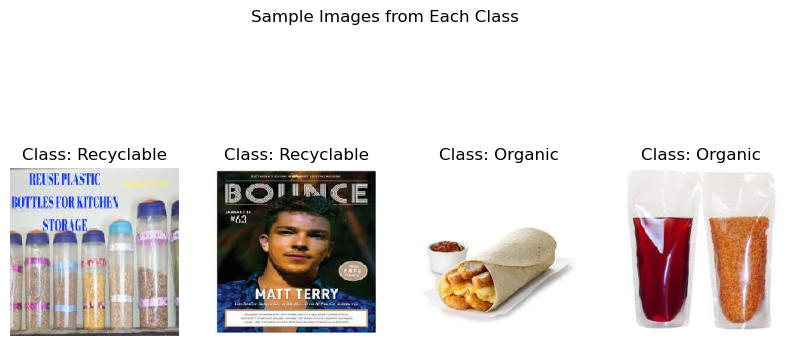

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up paths to the train and test directories (assuming data is under 'Downloads/Waste Sorting Dataset')
base_dir = r"C:\Users\siddd\AI ML\GREEN AI\Waste Sorting Dataset\DATASET\DATASET"
train_dir = base_dir + r"/TRAIN"
test_dir = base_dir + r"/TEST"

# Use ImageDataGenerator to prepare the data for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary'
)

# Display sample images from each class
plt.figure(figsize=(10, 5))
for i in range(4):  # Display 4 images (2 from each class if available)
    image, label = next(train_data)  # Use next() to get a batch of images
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])  # Display the first image in the batch
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

## Load and Configure MobileNet Model

In [6]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
mobilenet_model.trainable = False # Freeze base model layers

# Add custom layers for classification 
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#We start with a pre-trained MobileNet model, adding Layers to classify waste images into 0 or R.

## Train the model

In [7]:
history = model.fit(
    train_data,
    validation_data = test_data,
    epochs = 2
)

# After training the model, save it to a file
model.save('mobilenet_waste_classifier.h5')

loss, accuracy = model.evaluate(test_data)
print("Model Accuracy:", accuracy)

# The model learns over 5 epochs, seeing images in the training data, adjusting itself , and testing on new images

C:\Users\siddd\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 590s 829ms/step - accuracy: 0.8632 - loss: 0.3120 - val_accuracy: 0.9136 - val_loss: 0.2145
Epoch 2/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 435s 616ms/step - accuracy: 0.9335 - loss: 0.1756 - val_accuracy: 0.8922 - val_loss: 0.2566


79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 556ms/step - accuracy: 0.8934 - loss: 0.2474
Model Accuracy: 0.8921607732772827


## Evaluate the model

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

#Generate predictions
y_pred_prob = model.predict(test_data).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions
y_true = test_data.classes  # True labels from test data

#print classification report
print("Classification report:\n", classification_report(y_true, y_pred, target_names=['Organic', 'Recyclable']))

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


# Here, we measure the performance of the model

79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 552ms/step
Classification report:
               precision    recall  f1-score   support

     Organic       0.56      0.62      0.59      1401
  Recyclable       0.44      0.37      0.40      1112

    accuracy                           0.51      2513
   macro avg       0.50      0.50      0.49      2513
weighted avg       0.50      0.51      0.51      2513

Confusion Matrix:
 [[874 527]
 [700 412]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


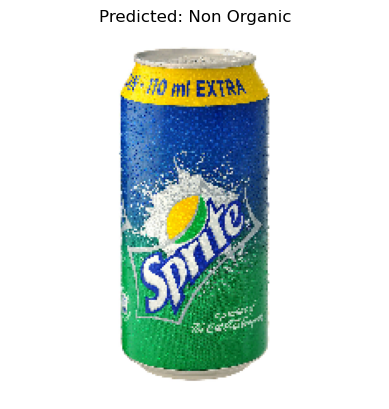

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing .image import load_img, img_to_array

# Path to the trained model and test image
model_path = 'mobilenet_waste_classifier.h5'
test_img_path = r"C:\Users\siddd\AI ML\GREEN AI\Waste Sorting Dataset\DATASET\TEST\R\R_11111.jpg"

# Load the trained model
model = tf.keras.models.load_model(model_path)

#Load and prepare the test image
test_img = load_img(test_img_path, target_size=(224, 224))  #Load image and resize
test_img_array = img_to_array(test_img) / 255.0  #Normal Pixel values
test_img_array = np.expand_dims(test_img_array, axis=0)  # Add batch dimension

#Predict the class of the test image
predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob < 0.5 else 'Non Organic'

# Display the test image and prediction
plt.imshow(test_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()